In [1]:
import os, sys
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt


def unpacker(df, key, num_exp=3, num_rounds=300, idx=0):
    result = []

    for i in range(num_rounds):
        single_elem = []
        for j in range(num_exp):
            single_elem.append(list(df[key])[j * (num_rounds * num_exp) + i * 3 + idx])
        # print(single_elem)
        # single_elem = round(sum(single_elem)/num_exp, 3)
        result.append(single_elem)
    result = torch.Tensor(result)
    mean = result.mean(dim=1)
    under = mean - result.std(dim=1)
    upper = mean + result.std(dim=1)

    mean, under, upper = mean.tolist(), under.tolist(), upper.tolist()
    return mean, under, upper

In [2]:
base_path = './log/gihun/cifar_095_iid/[cifarcnn-cifar10]baseline/results.csv'
lp_path = './log/gihun/cifar_095_iid/[cifarcnn-cifar10]local_pruning/results.csv'
lph_path = './log/gihun/cifar_095_iid/[cifarcnn-cifar10]local_pruning_half/results.csv'
sp_path = './log/gihun/cifar_095_iid/[cifarcnn-cifar10]server_pruning/results.csv'
spr_path = './log/gihun/cifar_095_iid/[cifarcnn-cifar10]server_pruning_reverse/results.csv'
base, df1, df2, df3, df4 = pd.read_csv(base_path), pd.read_csv(lp_path), pd.read_csv(lph_path), pd.read_csv(sp_path), pd.read_csv(spr_path)

In [3]:
cost0, cost1, cost2, cost3, cost4 = unpacker(base, 'Cost'), unpacker(df1, 'Cost'), unpacker(df2, 'Cost'), unpacker(df3, 'Cost'), unpacker(df4, 'Cost')
sparsity0, sparsity1, sparsity2, sparsity3, sparsity4 = unpacker(base, 'sparsity'), unpacker(df1, 'sparsity'), unpacker(df2, 'sparsity'), unpacker(df3, 'sparsity'), unpacker(df4, 'sparsity')
acc0, acc1, acc2, acc3, acc4 = unpacker(base, 'ACC', idx=2), unpacker(df1, 'ACC', idx=2), unpacker(df2, 'ACC', idx=2), unpacker(df3, 'ACC', idx=2), unpacker(df4, 'ACC', idx=2)
tr_loss0, tr_loss1, tr_loss2, tr_loss3, tr_loss4 = unpacker(base, 'Loss', idx=0), unpacker(df1, 'Loss', idx=0), unpacker(df2, 'Loss', idx=0), unpacker(df3, 'Loss', idx=0), unpacker(df4, 'Loss', idx=0)
te_loss0, te_loss1, te_loss2, te_loss3, te_loss4 = unpacker(base, 'Loss', idx=1), unpacker(df1, 'Loss', idx=1), unpacker(df2, 'Loss', idx=1), unpacker(df3, 'Loss', idx=1), unpacker(df4, 'Loss', idx=1)

In [4]:
rounds = [x + 1 for x in range(300)]

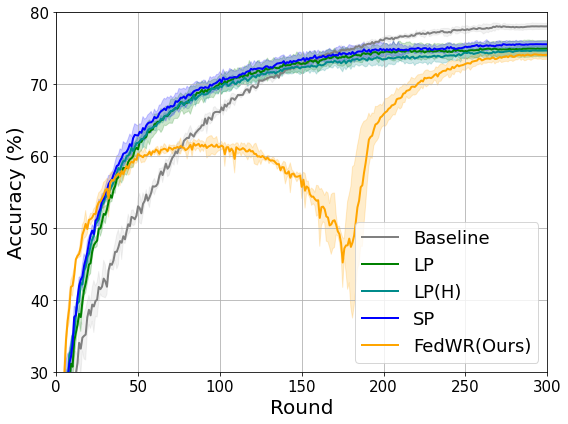

In [5]:
fig = plt.figure(figsize=(8, 6))
plt.yticks([10 * x for x in range(10)], fontsize=15)
plt.xticks([50 * x for x in range(7)], fontsize=15)

# Baseline
plt.plot(rounds, acc0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(rounds, acc0[1], acc0[2], color='gray', alpha=0.1)

# Local Pruning
plt.plot(rounds, acc1[0], label='LP', lw=2, color='green', alpha=1)
plt.fill_between(rounds, acc1[1], acc1[2], color='green', alpha=0.2)

# Local Pruning Half
plt.plot(rounds, acc2[0], label='LP(H)', lw=2, color='darkcyan', alpha=1)
plt.fill_between(rounds, acc2[1], acc2[2], color='darkcyan', alpha=0.2)

# Pruning
plt.plot(rounds, acc3[0], label='SP', lw=2, color='blue', alpha=1)
plt.fill_between(rounds, acc3[1], acc3[2], color='blue', alpha=0.2)

# FedRP
plt.plot(rounds, acc4[0], label='FedWR(Ours)', lw=2, color='orange', alpha=1)
plt.fill_between(rounds, acc4[1], acc4[2], color='orange', alpha=0.2)


# plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Round', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
plt.xlim(0, 300)
plt.ylim(30, 80)
plt.legend(fontsize=18, loc='best')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

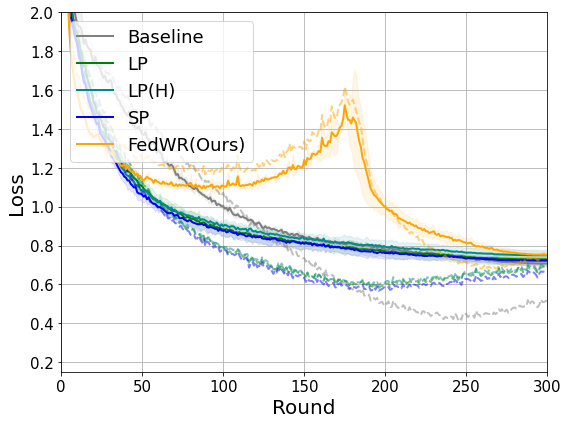

In [6]:
fig = plt.figure(figsize=(8, 6))
plt.xticks([50 * x for x in range(7)], fontsize=15)
plt.yticks([0.2 * y for y in range(11)], fontsize=15)

# baseline
plt.plot(rounds, te_loss0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(rounds, te_loss0[1], te_loss0[2], color='gray', alpha=0.1)
plt.plot(rounds, tr_loss0[0], lw=2, color='gray', alpha=0.5, linestyle='--')

# Local Pruning
plt.plot(rounds, te_loss1[0], label='LP', lw=2, color='green', alpha=1)
plt.fill_between(rounds, te_loss1[1], te_loss1[2], color='green', alpha=0.1)
plt.plot(rounds, tr_loss1[0], lw=2, color='green', alpha=0.5, linestyle='--')

# Local Pruning Half
plt.plot(rounds, te_loss2[0], label='LP(H)', lw=2, color='darkcyan', alpha=1)
plt.fill_between(rounds, te_loss2[1], te_loss2[2], color='darkcyan', alpha=0.1)
plt.plot(rounds, tr_loss2[0], lw=2, color='darkcyan', alpha=0.5, linestyle='--')

# baseline
plt.plot(rounds, te_loss3[0], label='SP', lw=2, color='blue', alpha=1)
plt.fill_between(rounds, te_loss3[1], te_loss3[2], color='blue', alpha=0.1)
plt.plot(rounds, tr_loss3[0], lw=2, color='blue', alpha=0.5, linestyle='--')

# baseline
plt.plot(rounds, te_loss4[0], label='FedWR(Ours)', lw=2, color='orange', alpha=1)
plt.fill_between(rounds, te_loss4[1], te_loss4[2], color='orange', alpha=0.1)
plt.plot(rounds, tr_loss4[0], lw=2, color='orange', alpha=0.5, linestyle='--')

# plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Round', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlim(0, 300)
plt.ylim(0.15, 2)
plt.legend(fontsize=18, loc='upper left')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

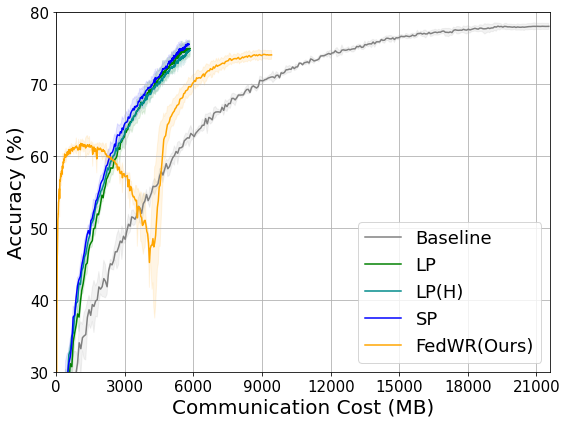

In [7]:
fig = plt.figure(figsize=(8, 6))
plt.yticks([10 * x for x in range(10)], fontsize=15)
plt.xticks([3000 * x for x in range(15)], fontsize=15)

# Baseline
plt.plot(cost0[0], acc0[0], label='Baseline', lw=1.5, color='gray', alpha=1)
plt.fill_between(cost0[0], acc0[1], acc0[2], color='gray', alpha=0.1)

# Local Pruning
plt.plot(cost1[0], acc1[0], label='LP', lw=1.5, color='green', alpha=1)
plt.fill_between(cost1[0], acc1[1], acc1[2], color='green', alpha=0.1)

# Local Pruning Half
plt.plot(cost2[0], acc2[0], label='LP(H)', lw=1.5, color='darkcyan', alpha=1)
plt.fill_between(cost2[0], acc2[1], acc2[2], color='darkcyan', alpha=0.1)

# Pruning
plt.plot(cost3[0], acc3[0], label='SP', lw=1.5, color='blue', alpha=1)
plt.fill_between(cost3[0], acc3[1], acc3[2], color='blue', alpha=0.1)

# FedRP
plt.plot(cost4[0], acc4[0], label='FedWR(Ours)', lw=1.5, color='orange', alpha=1)
plt.fill_between(cost4[0], acc4[1], acc4[2], color='orange', alpha=0.1)

plt.xlabel('Communication Cost (MB)', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
plt.xlim(0, 21600)
plt.ylim(30, 80)
plt.legend(fontsize=18, loc='best')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

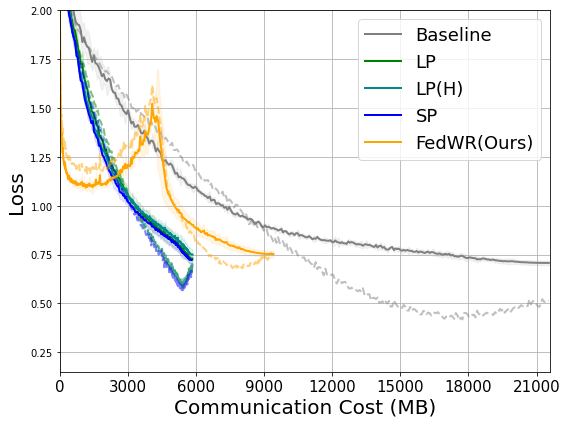

In [8]:
fig = plt.figure(figsize=(8, 6))
plt.xticks([2000 * x for x in range(10)], fontsize=15)
plt.xticks([3000 * x for x in range(15)], fontsize=15)

plt.plot(cost0[0], te_loss0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(cost0[0], te_loss0[1], te_loss0[2], color='gray', alpha=0.1)
plt.plot(cost0[0], tr_loss0[0], lw=2, color='gray', alpha=0.5, linestyle='--')

plt.plot(cost1[0], te_loss1[0], label='LP', lw=2, color='green', alpha=1)
plt.fill_between(cost1[0], te_loss1[1], te_loss1[2], color='green', alpha=0.1)
plt.plot(cost1[0], tr_loss1[0], lw=2, color='green', alpha=0.5, linestyle='--')

plt.plot(cost2[0], te_loss2[0], label='LP(H)', lw=2, color='darkcyan', alpha=1)
plt.fill_between(cost2[0], te_loss2[1], te_loss2[2], color='darkcyan', alpha=0.1)
plt.plot(cost2[0], tr_loss2[0], lw=2, color='darkcyan', alpha=0.5, linestyle='--')

plt.plot(cost3[0], te_loss3[0], label='SP', lw=2, color='blue', alpha=1)
plt.fill_between(cost3[0], te_loss3[1], te_loss3[2], color='blue', alpha=0.1)
plt.plot(cost3[0], tr_loss3[0], lw=2, color='blue', alpha=0.5, linestyle='--')

plt.plot(cost4[0], te_loss4[0], label='FedWR(Ours)', lw=2, color='orange', alpha=1)
plt.fill_between(cost4[0], te_loss4[1], te_loss4[2], color='orange', alpha=0.1)
plt.plot(cost4[0], tr_loss4[0], lw=2, color='orange', alpha=0.5, linestyle='--')


# plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Communication Cost (MB)', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlim(0, 21600)
plt.ylim(0.15, 2)
plt.legend(fontsize=18, loc='best')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()